# 1. Explain clearly why V_pi is not useful in the MC development above?

Since in MC method, most likely we do not have the model of the environment. So we don't know the state transition probability. Therefore, with only V(s) we cannot make a decision which action should be taken. 

# 2. The MC algorithm so far (ref: p 99), requires an infinite number of episodes for Eval to converge on Q_pi_k (step k). We can modify this algorithm to the practical variant where Eval is truncated (c.f., DynProg GPI). In this case:


# a. Will we obtain Q_pi_k from eval?

eventually, yes.

# b. If not why are we able to truncate Eval? Explain clearly.

The basic idea is that the truncate Eval provides improvement to Q_pi so that ideally a better policy can be drawn from this improved Q_pi. Therefore, even though truncate Eval would take more policy iteration steps, it would eventually converge to the optimal policy with a fit Q

# c. Assuming ES (i.e., thorough sampling of the S x A space), and the above truncated Eval_trunc, is it possible to converge on a sub-optimal policy pi_c? Is this a stable fixed point of the GPI for MC? Explain clearly.

No, when the policy is converged to improve very slowly based on the deficient Q from the truncated Eval, the truncated Eval will be repeated each iteration and become a complete Eval which gives a perfect Q_pi_c. If pi_c is not the optimal policy, the policy would still be inproved based on the perfect Q_pi_c.

# 3. Explain how you can synthesize a stochastic policy given what you know so far (you don't need to read ahead).

Using a e-greedy policy with decay each episode on e so the policy eventually becomes a deterministic policy.

# Code the algorithm for MC Control (Off Policy) and apply this to the Cart Pole problem. You must discretize the environmental feedback (S) in order to solve this problem properly.

In [1]:
from random import randint
import math
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [2]:
env = gym.make("CartPole-v0")

In [7]:
class MC():
  def __init__(self):
    self.stepsHistory = [0]*500000
    self.value = {}
    self.maxlifetime = 200
    self.c = {}
  
  def act(self, state):
    return np.argmax(self.value[state])


  def behavier_policy(self):
    return env.action_space.sample()

  def mc_sample(self, obs, epicode_count):
    episodeStatesActions = []
    G = 0
    w = 1
    for t in range(self.maxlifetime):
      state = self.getState(obs)
      action = self.behavier_policy()
      episodeStatesActions.append({'state': state, 'action': action})
      obs, reward, done, _ = env.step(action)
      G += reward
      if done:
        self.stepsHistory[epicode_count] = t
        for i in range(len(episodeStatesActions))[::-1]:
          state_action = episodeStatesActions[i]
          self.update(state_action['state'], state_action['action'], G-i, w)
          if state_action['action'] != self.act(state_action['state']):
            break
          w = w*2
        break

  def update(self, state, action, G, w):
    if not state in self.c:
      self.c[state] = []
      for _ in range(env.action_space.n):
        self.c[state].append(0)
    if not state in self.value:
      self.value[state] = []
      for _ in range(env.action_space.n):
        self.value[state].append(0)
    self.c[state][action] += w
    self.value[state][action] += (w / self.c[state][action]) * (G - self.value[state][action])


  def getState(self,obs):
    state = ""
    for o in obs:
      state += str(math.floor(o))
    return state

In [ ]:
"""  def act(self,state):
    maxValue = env.action_space.sample()
    if not state in self.value:
      self.value[state] = []
      for _ in range(env.action_space.n):
        self.value[state].append({'count':0, 'value':0})
    for action in range(env.action_space.n):
      if self.value[state][maxValue]['value'] < self.value[state][action]['value']:
        
        maxValue = action
      return maxValue"""

In [22]:
agent = MC()
for epicode_count in range(500000):
  obs = env.reset()
  agent.mc_sample(obs,epicode_count)

In [3]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [4]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [5]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 126


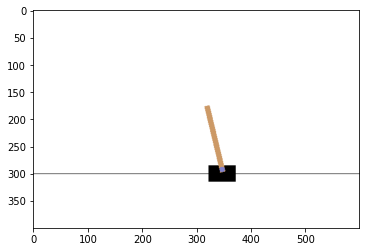

In [24]:

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
obs = env.reset()
for i in range(50000):
  state = agent.getState(obs)
  action = agent.act(state)
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)